In [19]:
import pandas as pd
import os

import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 
DATA_FOLDER_PTH=os.path.join(os.getcwd(), os.pardir, 'data')
 
TRAIN_AUDIO_FOLDER_PTH=os.path.join(DATA_FOLDER_PTH, 'raw/MELD/train', 'train_splits')
TRAIN_TEXT_FILE_PTH=os.path.join(DATA_FOLDER_PTH, 'raw/MELD/train', 'train_sent_emo.csv')
 
DEV_AUDIO_FOLDER_PTH=os.path.join(DATA_FOLDER_PTH, 'raw/MELD/dev', 'dev_splits_complete')
DEV_TEXT_FILE_PTH=os.path.join(DATA_FOLDER_PTH, 'raw/MELD/dev', 'dev_sent_emo.csv')
 
TEST_AUDIO_FOLDER_PTH=os.path.join(DATA_FOLDER_PTH, 'raw/MELD/test', 'output_repeated_splits_test')
TEST_TEXT_FILE_PTH=os.path.join(DATA_FOLDER_PTH, 'raw/MELD/test', 'test_sent_emo.csv')

## TODO 
importance of words

In [20]:
data = pd.read_csv(TRAIN_TEXT_FILE_PTH, encoding='utf-8')

In [21]:
corpus = data['Utterance']
corpus

0       also I was the point person on my company’s tr...
1                        You must’ve had your hands full.
2                                 That I did. That I did.
3           So let’s talk a little bit about your duties.
4                                  My duties?  All right.
                              ...                        
9984                                           You or me?
9985    I got it. Uh, Joey, women don't have Adam's ap...
9986                 You guys are messing with me, right?
9987                                                Yeah.
9988    That was a good one. For a second there, I was...
Name: Utterance, Length: 9989, dtype: object

# WORDCLOUD

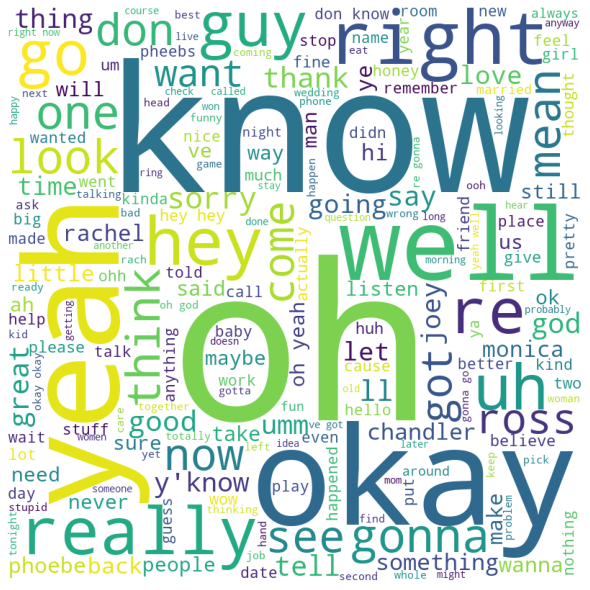

In [22]:
corpus = data['Utterance']

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in corpus:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10, min_word_length = 2).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# SENTENCE LENGTH DISTRIBUTION

In [23]:
corpus = data['Utterance']

sentence_length = pd.DataFrame(np.zeros(data['Utterance'].size), columns=['Length'])


for i, val in enumerate(corpus):
    
    val = str(val)
    tokens = val.split()
    
    sentence_length.loc[i, 'Length'] = len(tokens)

In [24]:
sentence_length.describe()

,Length
count,9989.000000
mean,7.948644
std,6.229899
min,1.000000
25%,3.000000
50%,6.000000
75%,11.000000
max,69.000000


<AxesSubplot:ylabel='Frequency'>

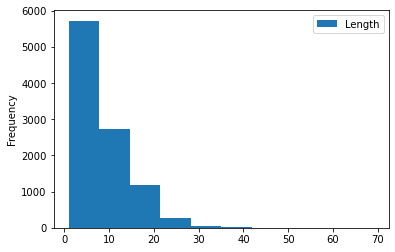

In [25]:
sentence_length.plot.hist()

# PUNCTUATION DISTRIBUTION PER UTTERANCE

In [26]:
corpus = data['Utterance']

punctuation_count = pd.DataFrame(np.zeros(data['Utterance'].size), columns=['Count'])

punctuations = ['.' , ',' , ';' , ':', '?' , '!' , '"' , '\'' , ')' , '(', "'"]


for i, val in enumerate(corpus):
     
    val = str(val)
    tokens = val.split()
    
    counter = 0
    for token in tokens:
        for punc in punctuations:
            if punc in token:
                counter += 1
            
    punctuation_count.loc[i, 'Count'] = counter

In [27]:
punctuation_count.describe()

,Count
count,9989.000000
mean,2.544499
std,1.935056
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,24.000000


<AxesSubplot:ylabel='Frequency'>

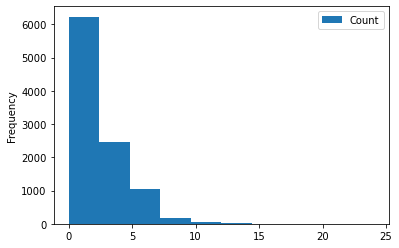

In [28]:
punctuation_count.plot.hist()

# Emotion labels

In [29]:
labels = data['Emotion']
labels.unique()

array(['neutral', 'surprise', 'fear', 'sadness', 'joy', 'disgust',
       'anger'], dtype=object)

# Labels count in train and val

In [34]:
labels.value_counts()

neutral     4710
joy         1743
surprise    1205
anger       1109
sadness      683
disgust      271
fear         268
Name: Emotion, dtype: int64

In [35]:
val_data = pd.read_csv(DEV_TEXT_FILE_PTH, encoding='utf-8')
val_labels = val_data['Emotion']
val_labels.value_counts()

neutral     470
joy         163
anger       153
surprise    150
sadness     111
fear         40
disgust      22
Name: Emotion, dtype: int64